In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tqdm import tqdm 
from PIL import Image
from sklearn.metrics import confusion_matrix
# import cv2 #pip install opencv-python==4.0.0.21
import glob

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K

from skimage.io import imread, imshow
from skimage.transform import resize

import rasterio as rio
from rasterio.plot import show

from build_model import model_arch
import utils
from metrics import *
from generator import DataGenerator

In [2]:
# !pip install matplotlib
# !pip install scikit-image
# !pip install rioxarray
# !pip install earthpy
# !pip install scikit-learn
# !pip install opencv-python==4.0.0.21

In [3]:
dataset = 'dataset_input/' # name of folder 
path_data = '/Users/Willem/Werk/510/510_cloud_detection/' + dataset
print(path_data)

model_name = '0113v0_model' # month, day, version, _model
path_model = '/notebooks/510_cloud_detection/saved_models/' + model_name
print(path_model)

/Users/Willem/Werk/510/510_cloud_detection/dataset_input/
/notebooks/510_cloud_detection/saved_models/0113v0_model


In [4]:
train_im = utils.get_list_of_files(os.path.join(path_data, 'rgb_images/train/'))
train_an = utils.get_list_of_files(os.path.join(path_data, 'annotations/train/'))

In [5]:
def pre_process_255(X):
    return X/255 #specify type?

In [9]:
train_gen = DataGenerator(train_im, train_an, pre_process_255, batch_size=4, width=256,
    height=256, augmentation=False)

In [10]:
model = model_arch(input_rows=256, input_cols=256, num_of_channels=3, num_of_classes=1)
model.compile(optimizer = Adam(lr = 1e-4), loss = jacc_loss, metrics = [dice_score,'accuracy'])


In [11]:
results = model.fit(train_gen, epochs=50, verbose=1)

Train for 78 steps
Epoch 1/50
 3/78 [>.............................] - ETA: 1:29:57 - loss: 0.8054 - dice_score: 0.3197 - accuracy: 0.3810

KeyboardInterrupt: 

In [90]:
img = Image.open(test_path)
(np.array(img)/255).astype(np.uint8)

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
# Initialize generators
train_gen = DataGenerator(train_im, train_an, classes, preproces_func, batch_size=batch_size, width=width,
    height=height, augmentation=True)
val_gen = DataGenerator(val_im, val_an, classes, preproces_func, batch_size=batch_size, width=width,
    height=height, augmentation=False)
# Start training
history = unet_model.fit_generator(train_gen, validation_data=val_gen, epochs=epochs,
    callbacks=[tensorboard, checkpointer])

In [ ]:

with rio.open('RGB_example.tif','w',driver='Gtiff', width=red.width, height=red.height,count=3,crs=red.crs,transform=red.transform, dtype=red.dtypes[0]) as rgb:
    rgb.write(blue.read(1),1)
    rgb.write(green.read(1),2)
    rgb.write(red.read(1),3)
    rgb.close()
    
    

## Visualization dataset

In [4]:
# dataset
# visualize training data, ground truth & rescaling

number_of_visualisations = 2
IMG_HEIGHT = 256
IMG_WIDTH = 256

random_indices = random.sample(range(0,350), number_of_visualisations)
print('random indices: ' + str(random_indices))
 
TRAIN_PATH_R = path_data + 'B4/train/'  #change path 
TRAIN_PATH_G = path_data + 'B3/train/'
TRAIN_PATH_B = path_data + 'B2/train/'

GT_PATH = path_data + 'BQA/train/'
 
for ind in random_indices:
    red    = Image.open(TRAIN_PATH_R + str(ind) + '.png').convert('L')
    green  = Image.open(TRAIN_PATH_G + str(ind) + '.png').convert('L')
    blue   = Image.open(TRAIN_PATH_B + str(ind) + '.png').convert('L')

    rgb = Image.merge("RGB",(red,green,blue))
    print('original image ' + str(ind) + ' of size ' + str(rgb.size))
    plt.imshow(rgb)
    plt.show()
    img_r = np.asarray(rgb) 
    img_r = resize(img_r, (IMG_HEIGHT, IMG_WIDTH, 3), mode='constant', preserve_range=True).astype('uint8')
    img_r_img = Image.fromarray(img_r, 'RGB') # own idea to realize an image plot
    print('resized image ' + str(ind) + ' of size ' + str(img_r_img.size))
    plt.imshow(img_r_img)
    plt.show()      

    gt = Image.open(GT_PATH + str(ind) + '.png')
    print('original gt ' + str(ind) + ' of size ' + str(gt.size))
    plt.imshow(gt)
    plt.show()
    gt_r = np.array(gt)[:,:,1] 
    gt_r = resize(gt_r, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True).astype('uint8')
    gt_r_img = Image.fromarray(gt_r, 'L') # own idea to realize an image plot
    print('resized gt ' + str(ind) + ' of size ' + str(gt_r_img.size))
    plt.imshow(gt_r_img)
    plt.show()




random indices: [166, 309]


NameError: name 'path_data' is not defined

In [151]:
import rioxarray as rxr
import xarray as xr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [152]:
#number_of_visualisations = 2
IMG_HEIGHT = 384
IMG_WIDTH = 384

#random_indices = random.sample(range(0,10), number_of_visualisations)
#print('random indices: ' + str(random_indices))

TRAIN_FOLDER = path_data + '38-Cloud_training/' 
TRAIN_PATH_R = path_data + '38-Cloud_training/train_red'  #change path 
TRAIN_PATH_G = path_data + '38-Cloud_training/train_green'
TRAIN_PATH_B = path_data + '38-Cloud_training/train_blue'

GT_PATH = path_data + '38-Cloud_training/train_gt'

def get_input_image_names(list_names, directory_name, if_train=True):
    list_img = []
    list_msk = []
    list_test_ids = []

    for filenames in tqdm(list_names['name'], miniters=1000):
        nred = 'red_' + filenames
        nblue = 'blue_' + filenames
        ngreen = 'green_' + filenames

        if if_train:
            dir_type_name = "train"
            fl_img = []
            nmask = 'gt_' + filenames
            fl_msk = directory_name + '/train_gt/' + '{}.TIF'.format(nmask)
            list_msk.append(fl_msk)

        else:
            dir_type_name = "test"
            fl_img = []
            fl_id = '{}.TIF'.format(filenames)
            list_test_ids.append(fl_id)

        fl_img_red = directory_name + '/' + dir_type_name + '_red/' + '{}.TIF'.format(nred)
        fl_img_green = directory_name + '/' + dir_type_name + '_green/' + '{}.TIF'.format(ngreen)
        fl_img_blue = directory_name + '/' + dir_type_name + '_blue/' + '{}.TIF'.format(nblue)
        fl_img.append(fl_img_red)
        fl_img.append(fl_img_green)
        fl_img.append(fl_img_blue)

        list_img.append(fl_img)

    if if_train:
        return list_img, list_msk
    else:
        return list_img, list_test_ids

train_patches_csv_name = 'training_patches_38-Cloud.csv'
df_train_img = pd.read_csv(os.path.join(TRAIN_FOLDER, train_patches_csv_name))
train_img, train_msk = get_input_image_names(df_train_img, TRAIN_FOLDER, if_train=True)

NameError: name 'path_data' is not defined

In [ ]:
train_patches_csv_name_ne = 'training_patches_38-cloud_nonempty.csv'
df_train_img_ne = pd.read_csv(os.path.join(TRAIN_FOLDER, train_patches_csv_name_ne))

lst_non_empty = []
for patch in df_train_img['name']:
    lst_non_empty.append       (df_train_img_ne['name'].where(df_train_img_ne['name'] == patch).isna().sum())

print(100*5155 - sum(lst_non_empty))

non_empty = [i for i,x in enumerate(lst_non_empty) if x < 5155]

print(non_empty)

for index in non_empty:
    print(df_train_img['name'][index])

In [ ]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

for ind in non_empty:
    # band_g = rxr.open_rasterio(train_img[ind][1], masked=True).squeeze()
    # band_g.shape
    # f, ax = plt.subplots()
    # band_g.plot.imshow(ax=ax, cmap='Greys_r')
    # ax.set_axis_off()
    # ax.set_title("Plot of Band Green")
    # Open all bands in a loop
    all_bands = []
    for i, aband in enumerate(train_img[ind]):
        all_bands.append(open_clean_bands(aband))
        # Assign a band number to the new xarray object
        all_bands[i]["band"]=i+1
    train_img_xr = xr.concat(all_bands, dim ='band')
    ep.plot_rgb(train_img_xr.values, rgb = [0, 1, 2], title='RGB Composite Image')
    plt.show()

## Generator

## Training model

In [6]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
 
TRAIN_PATH_R = path_data + 'B4/train/'  #change path 
TRAIN_PATH_G = path_data + 'B3/train/'
TRAIN_PATH_B = path_data + 'B2/train/'
 
TEST_PATH_R = path_data + 'B4/test/'
TEST_PATH_G = path_data + 'B3/test/'
TEST_PATH_B = path_data + 'B2/test/'
 
X_train = np.zeros((350, IMG_WIDTH, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
Y_train = np.zeros((350, IMG_WIDTH, IMG_WIDTH), dtype=np.float32)
img = np.zeros((IMG_WIDTH, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
 
tr=np.zeros(350)
 
for i in range(350):
       tr[i]=i;


In [ ]:
# # Visualize images

# rgb = Image.merge("RGB",(red,green,blue))
# print('original image ' + str(ind) + ' of size ' + str(rgb.size))
# plt.imshow(rgb)
# plt.show()
# img_r = np.asarray(rgb) 
# img_r = resize(img_r, (IMG_HEIGHT, IMG_WIDTH, 3), mode='constant', preserve_range=True).astype('uint8')
# img_r_img = Image.fromarray(img_r, 'RGB') # own idea to realize an image plot
# print('resized image ' + str(ind) + ' of size ' + str(img_r_img.size))
# plt.imshow(img_r_img)
# plt.show()      

# gt = Image.open(GT_PATH + str(ind) + '.png')
# print('original gt ' + str(ind) + ' of size ' + str(gt.size))
# plt.imshow(gt)
# plt.show()
# gt_r = np.array(gt)[:,:,1] 
# gt_r = resize(gt_r, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True).astype('uint8')
# gt_r_img = Image.fromarray(gt_r, 'L') # own idea to realize an image plot

In [ ]:
# train images
for n, id_ in tqdm(enumerate(tr),total=350):
    red    = Image.open(TRAIN_PATH_R + str(int(id_)) + '.png').convert('L')
    green  = Image.open(TRAIN_PATH_G + str(int(id_)) + '.png').convert('L')
    blue   = Image.open(TRAIN_PATH_B + str(int(id_)) + '.png').convert('L')

    rgb = Image.merge("RGB",(red,green,blue))
    img_b = np.asarray(rgb) 

    #img_r = imread(TRAIN_PATH_R + str(int(id_)) + '.png')[:,:,:IMG_CHANNELS]
    #img_g = imread(TRAIN_PATH_G + str(int(id_)) + '.png')[:,:,:IMG_CHANNELS]
    #img_b = imread(TRAIN_PATH_B + str(int(id_)) + '.png')[:,:,:IMG_CHANNELS]

    #img_r = resize(img_r, (IMG_HEIGHT, IMG_WIDTH, 1), mode='constant', preserve_range=True)
    #img_g = resize(img_g, (IMG_HEIGHT, IMG_WIDTH, 1), mode='constant', preserve_range=True)
    #img_b = resize(img_b, (IMG_HEIGHT, IMG_WIDTH, 1), mode='constant', preserve_range=True)

    img_b = resize(img_b, (IMG_HEIGHT, IMG_WIDTH, 3), mode='constant', preserve_range=True)
    img_b= (img_b/255.0)
    #for i in range(256):
    #       img[i] = np.concatenate((img_r[i],img_g[i],img_b[i]), axis=1)

    X_train[n] = img_b.astype(np.float32)

    #mask = Image.open('/content/drive/My Drive/Colab Notebooks/dataset/BQA/train/' + str(int(102+id_)) + '.png').convert('L')
    mask = imread(path_data + 'BQA/train/' + str(int(id_)) + '.png')[:,:,1]
    mask1 = resize(mask, (IMG_HEIGHT, IMG_WIDTH), order=0, mode='constant', preserve_range=True, anti_aliasing=False)
    #mask1 = np.asarray(mask)
    #mask1 = resize(mask1, (IMG_HEIGHT, IMG_WIDTH, 1), mode='constant', preserve_range=True)
 
    Y_train[n] = (mask1==231).astype(int)


100%|██████████| 350/350 [00:58<00:00,  5.94it/s]


In [ ]:
#test images
nr_images = 36

te=np.zeros(nr_images)
for i in range(nr_images):
    te[i]=i;

# for test images 
X_test = np.zeros((nr_images, IMG_WIDTH, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
Y_test = np.zeros((nr_images, IMG_WIDTH, IMG_WIDTH), dtype=np.float32)
img = np.zeros((IMG_WIDTH, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
sizes_test = []
 
for n, id_ in tqdm(enumerate(te),total=nr_images):
    if int(id_) <= 9:
        red    = Image.open(TEST_PATH_R + str(170+int(id_)) + '.png').convert('L')
        green  = Image.open(TEST_PATH_G + str(170+int(id_)) + '.png').convert('L')
        blue   = Image.open(TEST_PATH_B + str(170+int(id_)) + '.png').convert('L')
         
        rgb = Image.merge("RGB",(red,green,blue))
        img_b = np.asarray(rgb)  
        img_b = resize(img_b, (IMG_HEIGHT, IMG_WIDTH, 3), mode='constant', preserve_range=True)
        img_b=img_b/255.0

        X_test[n] = img_b

        mask = imread(path_data+ 'BQA/test/' + str(int(170+id_)) + '.png')[:,:,1]
        mask1 = resize(mask, (IMG_HEIGHT, IMG_WIDTH), order=0, mode='constant', preserve_range=True, anti_aliasing=False)
        
    else:
        red    = Image.open(TEST_PATH_R + str(314+int(id_)) + '.png').convert('L')
        green  = Image.open(TEST_PATH_G + str(314+int(id_)) + '.png').convert('L')
        blue   = Image.open(TEST_PATH_B + str(314+int(id_)) + '.png').convert('L')

        rgb = Image.merge("RGB",(red,green,blue))
        img_b = np.asarray(rgb)  
        img_b = resize(img_b, (IMG_HEIGHT, IMG_WIDTH, 3), mode='constant', preserve_range=True)
        img_b=img_b/255.0

        X_test[n] = img_b

        mask = imread(path_data+ 'BQA/test/' + str(int(314+id_)) + '.png')[:,:,1]
        mask1 = resize(mask, (IMG_HEIGHT, IMG_WIDTH), order=0, mode='constant', preserve_range=True, anti_aliasing=False)

    Y_test[n] = (mask1==231).astype(int)
    


100%|██████████| 36/36 [00:05<00:00,  6.07it/s]


In [8]:
model = model_arch(input_rows=256, input_cols=256, num_of_channels=3, num_of_classes=1)
model.compile(optimizer = Adam(lr = 1e-4), loss = jacc_coef, metrics = [jacc_coef,'accuracy'])


NameError: name 'Input' is not defined

In [ ]:
results = model.fit(X_train, Y_train, validation_split=0.05, batch_size=2, epochs=50, verbose=1)

Epoch 1/50
166/166 [==============================] - 68s 373ms/step - loss: 0.1521 - jacc_coef: 0.1521 - accuracy: 0.8793 - val_loss: 0.3347 - val_jacc_coef: 0.3347 - val_accuracy: 0.6813
Epoch 2/50
166/166 [==============================] - 61s 367ms/step - loss: 0.0775 - jacc_coef: 0.0775 - accuracy: 0.9400 - val_loss: 0.3200 - val_jacc_coef: 0.3200 - val_accuracy: 0.6813
Epoch 3/50
166/166 [==============================] - 61s 367ms/step - loss: 0.0681 - jacc_coef: 0.0681 - accuracy: 0.9481 - val_loss: 0.3177 - val_jacc_coef: 0.3177 - val_accuracy: 0.6814
Epoch 4/50
166/166 [==============================] - 61s 367ms/step - loss: 0.0554 - jacc_coef: 0.0554 - accuracy: 0.9592 - val_loss: 0.1391 - val_jacc_coef: 0.1391 - val_accuracy: 0.9349
Epoch 5/50
166/166 [==============================] - 61s 366ms/step - loss: 0.0519 - jacc_coef: 0.0519 - accuracy: 0.9613 - val_loss: 0.2985 - val_jacc_coef: 0.2985 - val_accuracy: 0.7191
Epoch 6/50
166/166 [==============================] - 6

In [ ]:
# Save the entire model 
model.save(path_model) 

NameError: name 'model' is not defined

In [ ]:
results.history

NameError: name 'results' is not defined

## Evaluating model

In [ ]:
# # Load model

# test_model = tf.keras.models.load_model(path_model, compile=False)
# test_model.compile(optimizer = Adam(lr = 1e-4), loss = jacc_coef, metrics = [jacc_coef,'accuracy'])


# # test_model.summary()

# preds_test = test_model.predict(X_test, verbose=1)
# test_pred = (preds_test > 0.5).astype(int)


NameError: name 'tf' is not defined

In [ ]:
model.evaluate(X_test, Y_test, batch_size=2)

18/18 [==============================] - 1s 64ms/step - loss: 0.9824 - jacc_coef: 0.9824 - accuracy: 0.0305


[0.9824028015136719, 0.9824028015136719, 0.030534956604242325]

In [ ]:
preds_test = model.predict(X_test, batch_size=2, verbose=1)
test_pred = (preds_test < 0.5).astype(int)

18/18 [==============================] - 1s 59ms/step


RGB image


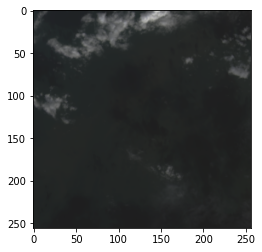

Ground truth


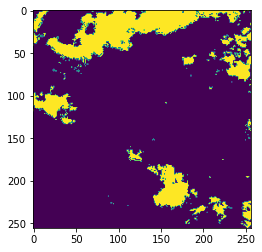

Prediction


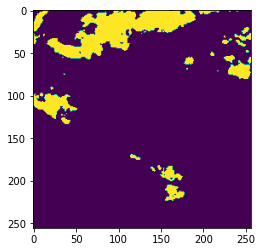

In [ ]:
image_id = 4

print('RGB image')
gt_img = X_test[image_id]
plt.imshow(gt_img)
plt.show()

print('Ground truth')
gt_img = Y_test[image_id].astype(int) 
plt.imshow(gt_img)
plt.show()

print('Prediction')
pred_img = test_pred[image_id][:,:,0]
plt.imshow(pred_img)
plt.show()

In [ ]:
mask = imread(path_data + 'BQA/train/' + str(int(image_id)) + '.png')[:,:,1]
mask1 = resize(mask, (IMG_HEIGHT, IMG_WIDTH), order=0, mode='constant', preserve_range=True, anti_aliasing=False)
 

In [ ]:
(mask1 == 231).astype(int)

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
def mean_iou(gt, mask):
    gt = gt.flatten()
    mask = mask.flatten()
    tn,fp,fn,tp = confusion_matrix(gt,mask).ravel()
    iou = tp/(tp+fn+fp)
    iou_n = tn/(tn+fn+fp)
    rec = 0.5 * iou + 0.5 * iou_n
    return(rec)

def fw_iou(gt, mask):
    gt = gt.flatten()
    mask = mask.flatten()
    tn,fp,fn,tp = confusion_matrix(gt,mask).ravel()
    iou = tp/(tp+fn+fp)
    iou_n = tn/(tn+fn+fp)
    cloud_weight = (tp + fp)/(tn + fp + fn + tp)
    rec = cloud_weight * iou + (1 - cloud_weight) * iou_n
    return(rec)

sum = 0
for i in range(len(Y_test)):
  #print('Jaccard Index ' + str(i) + ' ' + str(jaccard(Y_test[i],preds_test_t[i])))
  sum = sum + mean_iou(Y_test[i],test_pred[i])
mIoU = sum/len(Y_test)

sum = 0
for i in range(len(Y_test)):
  #print('Jaccard Index ' + str(i) + ' ' + str(jaccard(Y_test[i],preds_test_t[i])))
  sum = sum + fw_iou(Y_test[i],test_pred[i])
fwIoU = sum/len(Y_test)

print('Mean IoU: ' + str(mIoU))
print('Frequency weighted IoU: ' + str(fwIoU))


Mean IoU: 0.8635373612575186
Frequency weighted IoU: 0.9438622378879216


In [ ]:
from sklearn.metrics import confusion_matrix

def precision(gt,mask):
    gt = gt.flatten()
    mask = mask.flatten()
    tn,fp,fn,tp = confusion_matrix(gt,mask).ravel()
    prec = tp/(tp+fp)
    return(prec)

####recall---
def recall(gt,mask):
    gt = gt.flatten()
    mask = mask.flatten()
    tn,fp,fn,tp = confusion_matrix(gt,mask).ravel()
    rec = tp/(tp+fn)
    return(rec)

###f1 score--

def f1_score(prec,rec):
    f1 = 2*(prec*rec)/(prec+rec)
    return f1

  ### jaccard 
def jaccard(gt,mask):
    gt = gt.flatten()
    mask = mask.flatten()
    tn,fp,fn,tp = confusion_matrix(gt,mask).ravel()
    rec = tp/(tp+fn+fp)
    return(rec)

  ### jaccard 
def Overall(gt,mask):
    gt = gt.flatten()
    mask = mask.flatten()
    tn,fp,fn,tp = confusion_matrix(gt,mask).ravel()
    rec = (tp+tn)/(tp+fp+fn+tn)
    return(rec)

###aji score

def get_fast_aji(true, pred):
    
    true = np.copy(true) # ? do we need this
    pred = np.copy(pred)
    true_id_list = list(np.unique(true))
    pred_id_list = list(np.unique(pred))

    true_masks = [None,]
    for t in true_id_list[1:]:
        t_mask = np.array(true == t, np.uint8)
        true_masks.append(t_mask)
    
    pred_masks = [None,]
    for p in pred_id_list[1:]:
        p_mask = np.array(pred == p, np.uint8)
        pred_masks.append(p_mask)
    
    # prefill with value
    pairwise_inter = np.zeros([len(true_id_list) -1, 
                               len(pred_id_list) -1], dtype=np.float64)
    pairwise_union = np.zeros([len(true_id_list) -1, 
                               len(pred_id_list) -1], dtype=np.float64)

    # caching pairwise
    for true_id in true_id_list[1:]: # 0-th is background
        t_mask = true_masks[int(true_id)]
        pred_true_overlap = pred[t_mask > 0]
        pred_true_overlap_id = np.unique(pred_true_overlap)
        pred_true_overlap_id = list(pred_true_overlap_id)
        for pred_id in pred_true_overlap_id:
            if pred_id == 0: # ignore
                continue # overlaping background
            p_mask = pred_masks[int(pred_id)]
            total = (t_mask + p_mask).sum()
            inter = (t_mask * p_mask).sum()
            pairwise_inter[int(true_id)-1, int(pred_id)-1] = inter
            pairwise_union[int(true_id)-1, int(pred_id)-1] = total - inter
    #
    pairwise_iou = pairwise_inter / (pairwise_union + 1.0e-6)
    # pair of pred that give highest iou for each true, dont care 
    # about reusing pred instance multiple times
    paired_pred = np.argmax(pairwise_iou, axis=1)
    pairwise_iou = np.max(pairwise_iou, axis=1)
    # exlude those dont have intersection
    paired_true = np.nonzero(pairwise_iou > 0.0)[0]
    paired_pred = paired_pred[paired_true]
    # print(paired_true.shape, paired_pred.shape)
    overall_inter = (pairwise_inter[paired_true, paired_pred]).sum()
    overall_union = (pairwise_union[paired_true, paired_pred]).sum()
    #
    paired_true = (list(paired_true + 1)) # index to instance ID
    paired_pred = (list(paired_pred + 1))
    # add all unpaired GT and Prediction into the union
    unpaired_true = np.array([idx for idx in true_id_list[1:] if idx not in paired_true])
    unpaired_pred = np.array([idx for idx in pred_id_list[1:] if idx not in paired_pred])
    for true_id in unpaired_true:
        overall_union += true_masks[true_id].sum()
    for pred_id in unpaired_pred:
        overall_union += pred_masks[pred_id].sum()
    #
    aji_score = overall_inter / overall_union
    return aji_score

sum_prec = 0
sum_rec = 0
sum_jac = 0
sum_over = 0
for i in range(len(Y_test)):
    print(i)
    sum_prec = sum_prec + precision(Y_test[i],test_pred[i])
    sum_rec = sum_rec + recall(Y_test[i],test_pred[i])
    sum_jac = sum_jac + jaccard(Y_test[i],test_pred[i])
    sum_over = sum_over + Overall(Y_test[i],test_pred[i])
prec = sum_prec/len(Y_test)
rec = sum_rec/len(Y_test)
jaccard1 = sum_jac/len(Y_test)
Overall1 = sum_over/len(Y_test)


f1 = f1_score(prec,rec)
# aji = get_fast_aji(Y_test,test_pred)

print("Jaccard Index", jaccard1)
print("final f1", f1)
print("final precision",prec)
print("final recall",rec)
print("Overall Accuracy",Overall1)
# print("final aji",aji)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
Jaccard Index 0.7940930212986073
final f1 0.8856622335510347
final precision 0.8942234505206338
final recall 0.8772633907081568
Overall Accuracy 0.9693679809570312


In [ ]:
# # dataset png's
# dataset_path = '/Users/Willem/Werk/510/510_cloud_detection/dataset' #'/notebooks/510_cloud_detection/dataset'

# rgb_img_dir_path = dataset_path + '/rgb_images/test/'
# anno_dir_path = dataset_path + '/annotations/test/'

# utils.ensure_directory_existance(rgb_img_dir_path)
# utils.ensure_directory_existance(anno_dir_path)

# r_train_path = dataset_path + '/B4/train'
# g_train_path = dataset_path + '/B3/train'
# b_train_path = dataset_path + '/B2/train'
# anno_train_path = dataset_path + '/BQA/train'
# r_test_path = dataset_path + '/B4/test'
# g_test_path = dataset_path + '/B3/test'
# b_test_path = dataset_path + '/B2/test'
# anno_test_path = dataset_path + '/BQA/test'

# r_train_files = glob.glob(r_train_path+'/*.png')
# g_train_files = glob.glob(g_train_path+'/*.png')
# b_train_files = glob.glob(b_train_path+'/*.png')

# r_test_files = glob.glob(r_test_path+'/*.png')
# g_test_files = glob.glob(g_test_path+'/*.png')
# b_test_files = glob.glob(b_test_path+'/*.png')


In [ ]:
## Read and write dataset train

# IMG_WIDTH = 256
# IMG_HEIGHT = 256
# IMG_CHANNELS = 3
# nr_imgs = len(b_train_files)

# TRAIN_PATH_R = path_data + 'B4/train/'  #change path 
# TRAIN_PATH_G = path_data + 'B3/train/'
# TRAIN_PATH_B = path_data + 'B2/train/'
 
# X_train = np.zeros((nr_imgs, IMG_WIDTH, IMG_WIDTH, IMG_CHANNELS), dtype='int')
# Y_train = np.zeros((nr_imgs, IMG_WIDTH, IMG_WIDTH), dtype='int')
# img = np.zeros((IMG_WIDTH, IMG_WIDTH, IMG_CHANNELS), dtype='int')
 
# tr=np.zeros(nr_imgs)
 
# for i in range(nr_imgs):
#        tr[i]=i;

# for n, id_ in tqdm(enumerate(tr),total=nr_imgs):
#     red    = Image.open(TRAIN_PATH_R + str(int(id_)) + '.png').convert('L')
#     green  = Image.open(TRAIN_PATH_G + str(int(id_)) + '.png').convert('L')
#     blue   = Image.open(TRAIN_PATH_B + str(int(id_)) + '.png').convert('L')

#     rgb = Image.merge("RGB",(red,green,blue))
#     img_b = np.asarray(rgb) 
    
#     img_b = resize(img_b, (IMG_HEIGHT, IMG_WIDTH, 3), mode='constant', preserve_range=True).astype(np.uint8)
        
#     if img_b.shape != (256, 256, 3):
#         print('warning shape doesnt seem right', id_)

#     save_img = Image.fromarray(img_b, 'RGB')
#     save_img.save(rgb_img_dir_path + str(int(id_)) + '.png')
#     X_train[n] = img_b

    
#     mask = imread(path_data + 'BQA/train/' + str(int(id_)) + '.png')[:,:,1]
#     mask1 = resize(mask, (IMG_HEIGHT, IMG_WIDTH), order=0, mode='constant', preserve_range=True, anti_aliasing=False)
#     anno = ((mask1==231)*255).astype(np.uint8)
    
#     if np.sum(anno) == 0:
#         print('no clouds ', id_)
    
#     save_anno = Image.fromarray(anno)
#     save_anno.save(anno_dir_path + str(int(id_)) + '.png')
#     Y_train[n] = anno
        

In [ ]:
# #Read and write dataset test images
# nr_images = 36 #36
 
# TEST_PATH_R = path_data + 'B4/test/'
# TEST_PATH_G = path_data + 'B3/test/'
# TEST_PATH_B = path_data + 'B2/test/'

# te=np.zeros(nr_images)
# for i in range(nr_images):
#     te[i]=i;

# # for test images 
# X_test = np.zeros((nr_images, IMG_WIDTH, IMG_WIDTH, IMG_CHANNELS), dtype='int')
# Y_test = np.zeros((nr_images, IMG_WIDTH, IMG_WIDTH), dtype='int')
# img = np.zeros((IMG_WIDTH, IMG_WIDTH, IMG_CHANNELS), dtype='int')
# sizes_test = []
 
# for n, id_ in tqdm(enumerate(te),total=nr_images):
#     if int(id_) <= 9:
#         red    = Image.open(TEST_PATH_R + str(170+int(id_)) + '.png').convert('L')
#         green  = Image.open(TEST_PATH_G + str(170+int(id_)) + '.png').convert('L')
#         blue   = Image.open(TEST_PATH_B + str(170+int(id_)) + '.png').convert('L')
         
#         rgb = Image.merge("RGB",(red,green,blue))
#         img_b = np.asarray(rgb)  
#         img_b = resize(img_b, (IMG_HEIGHT, IMG_WIDTH, 3), mode='constant', preserve_range=True).astype(np.uint8)
# #         img_b=img_b/255.0
#         if img_b.shape != (256, 256, 3):
#             print('warning shape doesnt seem right', id_)
        
#         save_img = Image.fromarray(img_b, 'RGB')
#         save_img.save(rgb_img_dir_path + str(int(id_)) + '.png')
#         X_test[n] = img_b

#         mask = imread(path_data+ 'BQA/test/' + str(int(170+id_)) + '.png')[:,:,1]
#         mask1 = resize(mask, (IMG_HEIGHT, IMG_WIDTH), order=0, mode='constant', preserve_range=True, anti_aliasing=False)
        
        
#     else:
#         red    = Image.open(TEST_PATH_R + str(314+int(id_)) + '.png').convert('L')
#         green  = Image.open(TEST_PATH_G + str(314+int(id_)) + '.png').convert('L')
#         blue   = Image.open(TEST_PATH_B + str(314+int(id_)) + '.png').convert('L')

#         rgb = Image.merge("RGB",(red,green,blue))
#         img_b = np.asarray(rgb)  
#         img_b = resize(img_b, (IMG_HEIGHT, IMG_WIDTH, 3), mode='constant', preserve_range=True).astype(np.uint8)
# #         img_b=img_b/255.0
#         if img_b.shape != (256, 256, 3):
#             print('warning shape doesnt seem right', id_)
        
#         save_img = Image.fromarray(img_b, 'RGB')
#         save_img.save(rgb_img_dir_path + str(int(id_)) + '.png')
#         X_test[n] = img_b

#         mask = imread(path_data+ 'BQA/test/' + str(int(314+id_)) + '.png')[:,:,1]
#         mask1 = resize(mask, (IMG_HEIGHT, IMG_WIDTH), order=0, mode='constant', preserve_range=True, anti_aliasing=False)

#     anno = ((mask1==231)*255).astype(np.uint8)
#     if np.sum(anno) == 0:
#         print('no clouds ', id_)
    
#     save_anno = Image.fromarray(anno)
#     save_anno.save(anno_dir_path + str(int(id_)) + '.png')
    
#     Y_test[n] = anno
    


In [ ]:
### Read in and plot dataset 38


## dataset_38 tif's
# dataset_path = '/Users/Willem/Werk/510/510_cloud_detection/dataset_38'

# rgb_img_dir_path = dataset_path + '/rgb_images'
# anno_dir_path = dataset_path + '/annotations'

# r_train_path = dataset_path + '/38-Cloud_training/train_red'
# g_train_path = dataset_path + '/38-Cloud_training/train_green'
# b_train_path = dataset_path + '/38-Cloud_training/train_blue'
# anno_train_path = dataset_path + '/38-Cloud_training/train_gt'
# r_test_path = dataset_path + '/38-Cloud_test/test_red'
# g_test_path = dataset_path + '/38-Cloud_test/test_green'
# b_test_path = dataset_path + '/38-Cloud_test/test_blue'
# anno_test_path = dataset_path + '/38-Cloud_test/test_gt'




# non_empty = []

# for ind in range(len(r_train_path)):
#     red = rio.open(r_train_files[ind])
#     green = rio.open(g_train_files[ind])
#     blue = rio.open(b_train_files[ind])
    
#     if np.sum(red.read()) > 0:
#         file_name = os.path.basename(r_train_files[ind]).replace('red_patch_', '')
#         non_empty.append(file_name)
        
#     if np.sum(green.read()) > 0:
#         file_name = os.path.basename(g_train_files[ind]).replace('green_patch_', '')
#         non_empty.append(file_name)
        
#     if np.sum(blue.read()) > 0:
#         file_name = os.path.basename(b_train_files[ind]).replace('blue_patch_', '')
#         non_empty.append(file_name)
        
# non_empty = list(set(non_empty))

# for ind in range(len(non_empty)):
#     # find the index of the non empty image (different for all bands)
#     index_r = [i for i, s in enumerate(r_train_files) if non_empty[ind] in s][0]
#     index_g = [i for i, s in enumerate(g_train_files) if non_empty[ind] in s][0]
#     index_b = [i for i, s in enumerate(b_train_files) if non_empty[ind] in s][0]
    
#     # open the same image for all bands
#     red = rio.open(r_train_files[index_r])
#     green = rio.open(g_train_files[index_g])
#     blue = rio.open(b_train_files[index_b])
    
#     rgb_array = np.stack([(red.read(1)/256).astype('uint8'), (green.read(1)/256).astype('uint8') ,(blue.read(1)/256).astype('uint8')], axis=2)
#     plt.imshow(rgb_array)
#     plt.show()